# Lab 1 - Medical Imaging

## Importing libraries

In [2]:
import numpy as np
from scipy.io import loadmat
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter

## Loading data

In [23]:
x = loadmat('ct.mat')

# select variable 'im' and convert it from dictionary to numpy array
im = np.array(x['ct'])

# print image size
[rows, cols, slices] = im.shape
print(rows, cols, slices)

512 512 256


## Display images

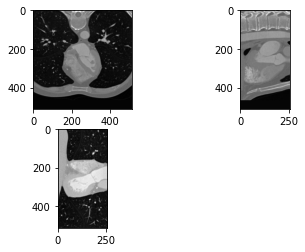

In [4]:
ax_slice = im[:,:,slices//2]
sag_slice = im[:, cols//2, :]
cor_slice = im[rows//2, :, :]


plt.figure("Mid Orthogonal Slices")
plt.subplot(2, 2, 1)
plt.imshow(ax_slice, cmap="gray")
plt.subplot(2, 2, 2)
plt.imshow(sag_slice, cmap="gray")
plt.subplot(2, 2, 3)
plt.imshow(cor_slice, cmap="gray")

## 1. Display a histogram of the CT image intensities (i.e. CT indexes), and then a histogram  of the corresponding attenuation coefficients, by converting CT indexes to attenuation coefficients.

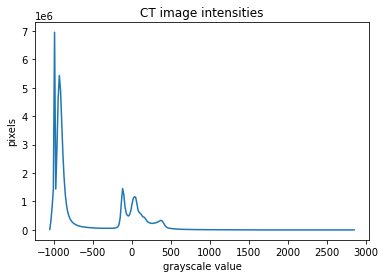

In [5]:
# create the histogram
histogram, bin_edges = np.histogram(im, bins=256)
# configure and draw the histogram figure
plt.figure()
plt.title("CT image intensities")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.plot(bin_edges[0:-1], histogram)

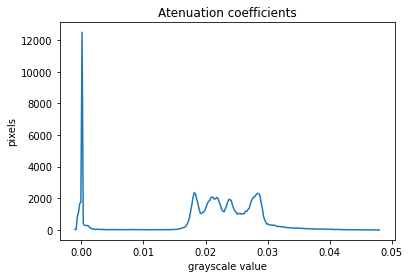

In [6]:
# create the histogram
mu_H2O = 0.0206
mu_ct = sag_slice*mu_H2O/1000 + mu_H2O
histogram, bin_edges = np.histogram(mu_ct, bins=256)
# configure and draw the histogram figure
plt.figure()
plt.title("Atenuation coefficients")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.plot(bin_edges[0:-1], histogram)

## 2. Display 9 representative slices of the image of attenuation coefficients for each  orientation - axial (x,y), sagittal (x,z) and coronal (y,z)

Text(0.5, 0.98, 'Axial plane')

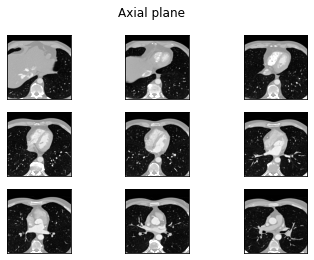

In [11]:
# Axial plane
slice_jump = slices//9

plt.figure('Showing Multiple Slices')
for n in range(1, 10):
    sl = 1 + (n-1)*slice_jump
    axsltmp = im[:, :, sl]
    plt.subplot(3, 3, n)
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(axsltmp, cmap='gray', origin='lower', vmin=-1000, vmax=500)

plt.suptitle('Axial plane')

Text(0.5, 0.98, 'Sagital plane')

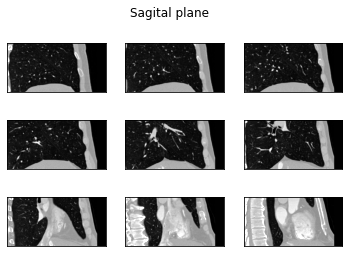

In [25]:
# Sagital plane
slice_jump = slices//9

plt.figure('Showing Multiple Slices')
for n in range(1, 10):
    sl = 1 + (n-1)*slice_jump
    axsltmp = im[:, sl, :]
    plt.subplot(3, 3, n)
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(np.rot90(axsltmp), cmap='gray', vmin=-1000, vmax=500)

plt.suptitle('Sagital plane')

Text(0.5, 0.98, 'Coronal plane')

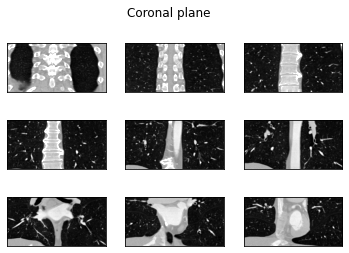

In [29]:
# Coronal plane
slice_jump = slices//9

plt.figure('Showing Multiple Slices')
for n in range(1, 10):
    sl = 1 + (n-1)*slice_jump
    axsltmp = im[sl, :, :]
    plt.subplot(3, 3, n)
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(np.rot90(axsltmp), cmap='gray', vmin=-1000, vmax=500)

plt.suptitle('Coronal plane')

## 3. Simulate the planar X-ray image that would be obtained by projection along x, assuming that the incident X-ray beam has an intensity I0 = 1200 photons/pixel.

### a. Compute the voxel size along each direction

In [34]:
height = 240/slices/10;
width = 180/cols/10;
depth = 180/rows/10;
print(f'height: {height}\nwidth : {width}\ndepth : {depth}')

height: 0.09375
width : 0.03515625
depth : 0.03515625


### b. Write down the attenuation equation, and apply it

In [97]:
I0 = 1200
attenuation =np.squeeze(I0*np.exp(-(mu_ct+1)*depth))

### c. Display the resulting projection image

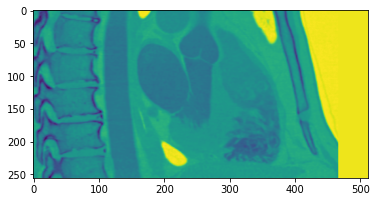

In [98]:
plt.imshow(np.rot90(attenuation))

## 4. Now simulate the planar X-ray image that would be obtained by

### a. Projection along x but using twice the X-ray tube current intensity: what changed? (hint: look at the histograms!)

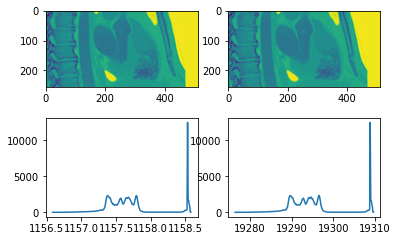

In [101]:
plt.subplot(2,2,1);
plt.imshow(np.rot90(attenuation));

I02 = 10000*2;
attenuation2 = np.squeeze(I02*np.exp(-(mu_ct+1)*depth));
plt.subplot(2,2,2);
plt.imshow(np.rot90(attenuation2)); 

plt.subplot(2,2,3);
histogram, bin_edges = np.histogram(attenuation, bins=256)
plt.plot(bin_edges[0:-1], histogram)

plt.subplot(2,2,4);
histogram, bin_edges = np.histogram(attenuation2, bins=256)
plt.plot(bin_edges[0:-1], histogram)

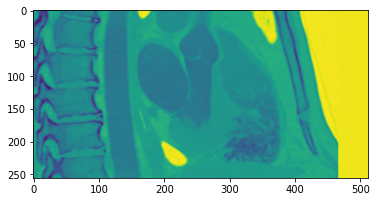

In [106]:
y_projection = np.squeeze(I0*np.exp(-(mu_ct+2)*width));
plt.imshow(np.rot90(y_projection))